In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import glob
from scipy.misc import imread
from keras.preprocessing.image import load_img,img_to_array
from keras.layers import Flatten
from glob import iglob
from sklearn.decomposition import PCA

Using TensorFlow backend.


In [32]:
img_data, j, mask_flatten= [], -1, []
for i in glob.glob("./t_images/*.jpg"):
    j += 1
    if j == 10:
        break
#     temp = cv2.imread(i, cv2.IMREAD_GRAYSCALE).resize(240,180,3)
    temp = load_img(i, target_size=(240, 180, 3))
    temp = img_to_array(temp).flatten()
    img_data.append(temp)
#     img_data = img_data
    
img_data = np.array(img_data, dtype = int)
# img_data = img_data/255

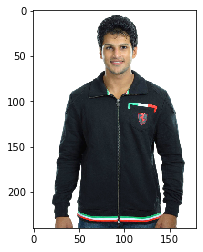

In [33]:
plt.imshow((img_data[0].reshape(240, 180,3)))

In [34]:
img_data.shape

(10, 129600)

In [35]:
# temp = cv2.resize(temp, (180, 240))

In [36]:
# temp.shape

In [59]:
n = 8

pca = PCA(
    n_components = n,
    svd_solver = 'auto'
)
pca.fit(img_data)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [60]:
pca.components_.shape

(8, 129600)

In [61]:
mini, maxi = pca.components_.min(), pca.components_.max()
qwe = (pca.components_ - mini) / (maxi - mini)

In [62]:
qwe.shape

(8, 129600)

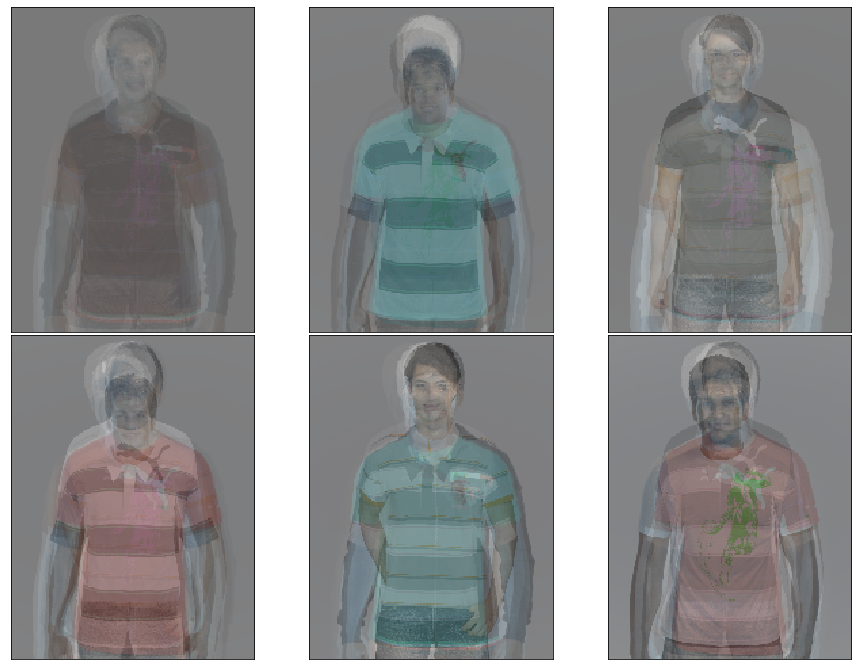

In [63]:
fig, axes = plt.subplots(2, 3,figsize=(16,12), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(qwe[i].reshape(240, 180,3))

In [64]:
trans = pca.transform(img_data)
a = pca.inverse_transform(trans)

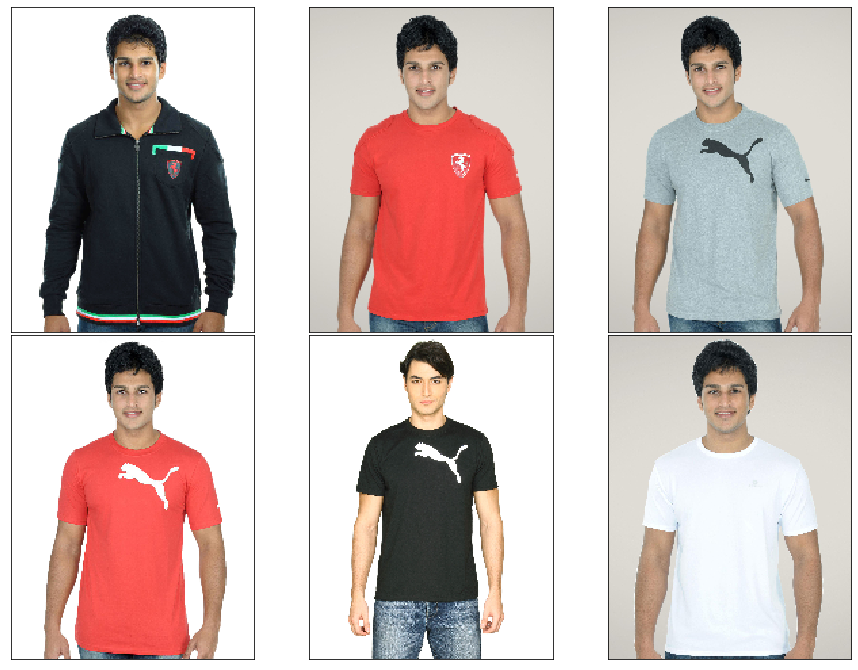

In [65]:
# plt.imshow(temp)
fig, axes = plt.subplots(2, 3,figsize=(16,12), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(img_data[i].reshape(240, 180,3))

In [66]:
a.shape

(10, 129600)

In [67]:
q = np.zeros(shape = a.shape)
# q[i].reshape(240,180,3).astype('uint8')

import math
for i in range(len(a)):
    for j in range(len(a[i])):
        q[i][j] = int(math.floor(a[i][j]))

In [68]:
q.shape

(10, 129600)

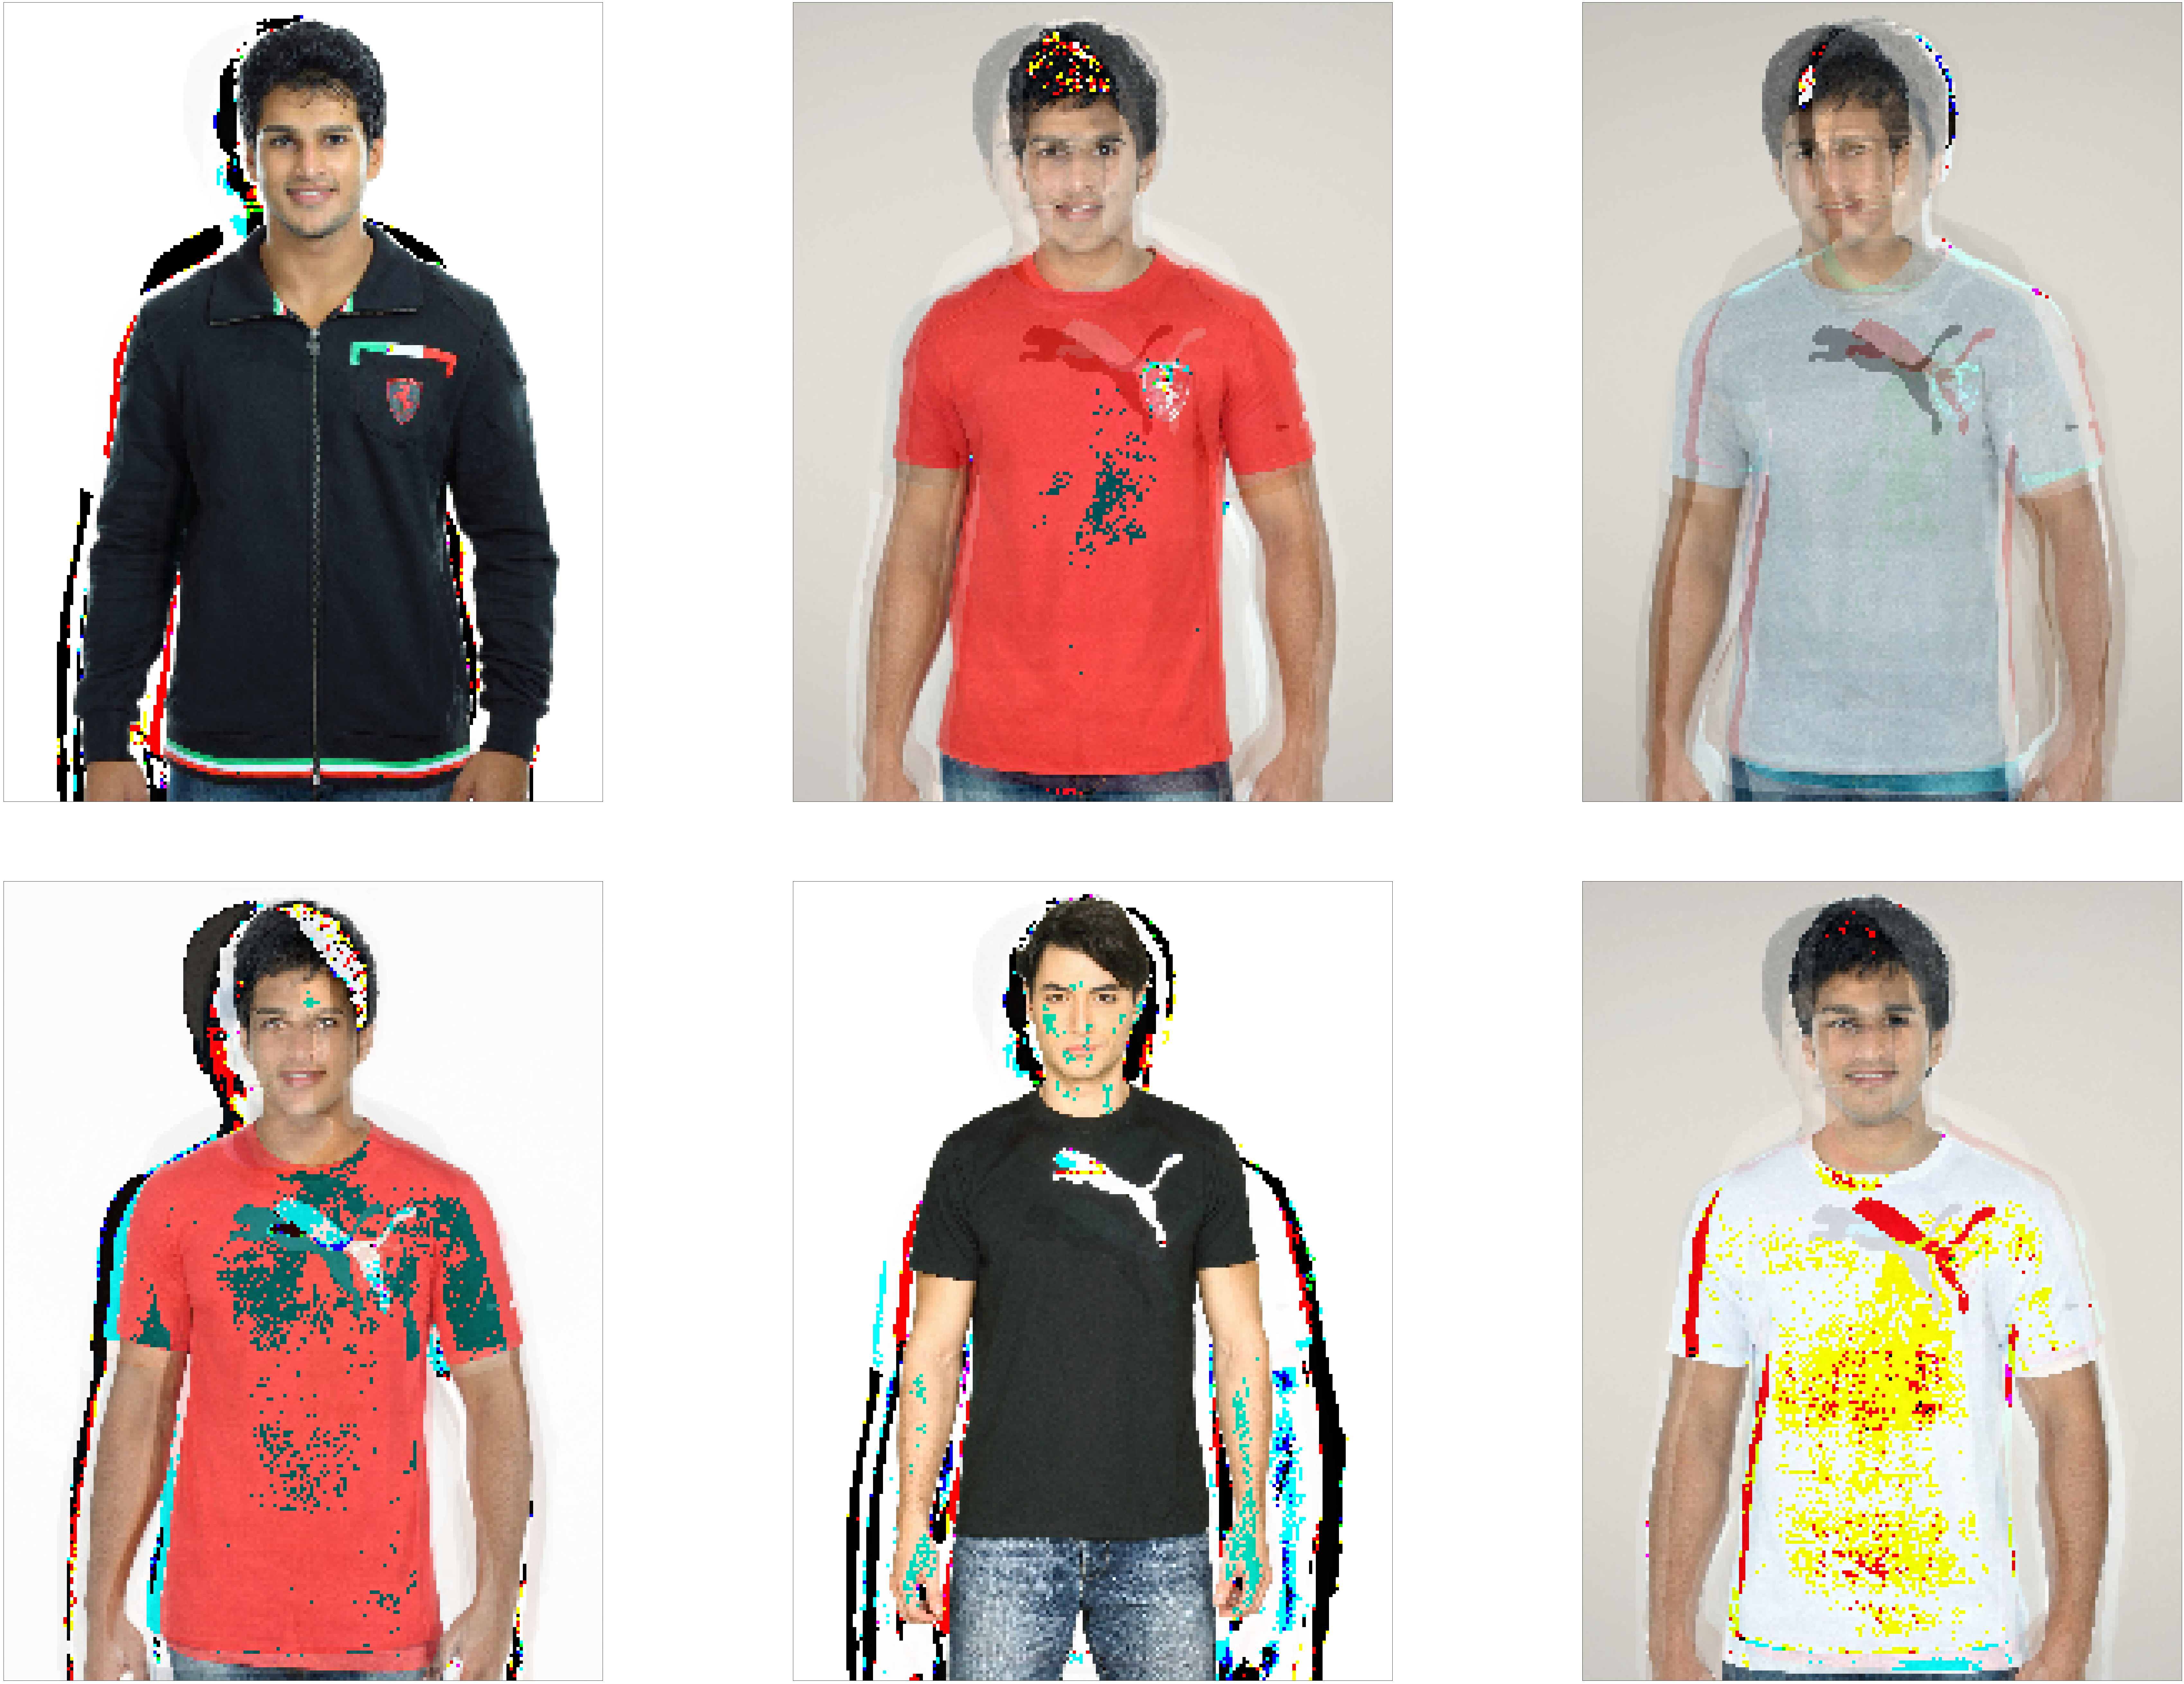

In [69]:
fig, axes = plt.subplots(2,3,figsize=(16*4*2, 12*4*2), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(q[i].reshape(240,180,3).astype('uint8'))
#     ax.savefig("1.jpg")   

# for i in range(len(q)):
#     cv2.imwrite(str(i)+".jpg", q[i].reshape(2400,1800,3).astype('uint8'))
#     plt.imshow(q[i].reshape(2400,1800,3).astype('uint8'))

In [464]:
pca.components_

array([[-1.73046755e-15,  9.91976381e-16, -4.55195210e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.55292388e-15,  2.25834497e-15, -1.59741350e-15, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.47318285e-15, -3.31768106e-15, -1.30873773e-15, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 2.04468314e-15,  9.24394403e-16, -3.37091932e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.05449772e-15,  5.25503033e-16,  8.17491763e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.18802200e-16, -8.28456493e-16,  7.28816651e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
img_data